## MMDetection 설치

In [1]:
import torch
print(torch.__version__)

2.2.1+cu121


In [ ]:
!pip install torch==1.13.0+cu116 torchvision==0.14.0+cu116 --extra-index-url https://download.pytorch.org/whl/cu116

In [ ]:
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu116/torch1.13/index.html

In [ ]:
!git clone --branch 2.x https://github.com/open-mmlab/mmdetection.git
!cd mmdetection; python setup.py install

In [ ]:
!pip install yapf==0.40.1

In [1]:
# 아래를 수행하기 전에 kernel을 restart 해야 함.
from mmdet.apis import init_detector, inference_detector
import mmcv

/usr/local/lib/python3.10/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


## PASCAL VOC 형태의 BCCD Dataset을 Download후 MS-COCO형태로 변경
- BCCD Dataset은 백혈구(WBC), 적혈구(RBC), 혈소판(Platelets) 세 가지 유형의 Object Class를 가짐.
- 다운로드 받은 Dataset은 Pascal VOC 형태이므로, 이를 별도의 유틸리티를 이용하여 MS-COCO 형태로 변환

In [2]:
!git clone https://github.com/Shenggan/BCCD_Dataset.git

Cloning into 'BCCD_Dataset'...
remote: Enumerating objects: 800, done.
remote: Total 800 (delta 0), reused 0 (delta 0), pack-reused 800
Receiving objects: 100% (800/800), 7.39 MiB | 36.02 MiB/s, done.
Resolving deltas: 100% (378/378), done.


## VOC를 COCO로 변환하는 package 적용하기

In [3]:
!git clone https://github.com/yukkyo/voc2coco.git

Cloning into 'voc2coco'...
remote: Enumerating objects: 436, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 436 (delta 19), reused 11 (delta 11), pack-reused 408
Receiving objects: 100% (436/436), 214.06 KiB | 7.38 MiB/s, done.
Resolving deltas: 100% (390/390), done.


In [4]:
# json으로 바꾸기 전 일단 label 파일이 필요하다
import os

with open('/content/BCCD_Dataset/BCCD/labels.txt', 'w') as f:
    f.write("WBC\n")
    f.write("RBC\n")
    f.write("Platelets\n")

!cat /content/BCCD_Dataset/BCCD/labels.txt

WBC
RBC
Platelets


In [40]:
# VOC를 COCO로 변환 수행. 학습/ 검증/ 테스트 용 json annotation을 생성
# VOC, XML을 위한(?)모델도 있는데, 디렉토리 구조를 정확히 지켜줘야 해서 까다롭다.
# 그래서 Annotation을 하나로 묶어주는 것
# 이전까지는 메타 파일을 사용했다면, 이건 진짜 Annotation 파일!
%cd voc2coco
!python voc2coco.py --ann_dir /content/BCCD_Dataset/BCCD/Annotations \
--ann_ids /content/BCCD_Dataset/BCCD/ImageSets/Main/train.txt \
--labels /content/BCCD_Dataset/BCCD/labels.txt \
--output /content/BCCD_Dataset/BCCD/train.json \
--ext xml

!python voc2coco.py --ann_dir /content/BCCD_Dataset/BCCD/Annotations \
--ann_ids /content/BCCD_Dataset/BCCD/ImageSets/Main/val.txt \
--labels /content/BCCD_Dataset/BCCD/labels.txt \
--output /content/BCCD_Dataset/BCCD/val.json \
--ext xml

!python voc2coco.py --ann_dir /content/BCCD_Dataset/BCCD/Annotations \
--ann_ids /content/BCCD_Dataset/BCCD/ImageSets/Main/test.txt \
--labels /content/BCCD_Dataset/BCCD/labels.txt \
--output /content/BCCD_Dataset/BCCD/test.json \
--ext xml

[Errno 2] No such file or directory: 'voc2coco'
/content/mmdetection
python3: can't open file '/content/mmdetection/voc2coco.py': [Errno 2] No such file or directory
python3: can't open file '/content/mmdetection/voc2coco.py': [Errno 2] No such file or directory
python3: can't open file '/content/mmdetection/voc2coco.py': [Errno 2] No such file or directory


In [ ]:
!cat /content/BCCD_Dataset/BCCD/train.json

{"images": [{"file_name": "BloodImage_00001.jpg", "height": 480, "width": 640, "id": "BloodImage_00001"}, {"file_name": "BloodImage_00003.jpg", "height": 480, "width": 640, "id": "BloodImage_00003"}, {"file_name": "BloodImage_00004.jpg", "height": 480, "width": 640, "id": "BloodImage_00004"}, {"file_name": "BloodImage_00005.jpg", "height": 480, "width": 640, "id": "BloodImage_00005"}, {"file_name": "BloodImage_00006.jpg", "height": 480, "width": 640, "id": "BloodImage_00006"}, {"file_name": "BloodImage_00008.jpg", "height": 480, "width": 640, "id": "BloodImage_00008"}, {"file_name": "BloodImage_00009.jpg", "height": 480, "width": 640, "id": "BloodImage_00009"}, {"file_name": "BloodImage_00010.jpg", "height": 480, "width": 640, "id": "BloodImage_00010"}, {"file_name": "BloodImage_00012.jpg", "height": 480, "width": 640, "id": "BloodImage_00012"}, {"file_name": "BloodImage_00013.jpg", "height": 480, "width": 640, "id": "BloodImage_00013"}, {"file_name": "BloodImage_00020.jpg", "height": 

In [ ]:
# annotation json 파일을 잘 볼 수 있는 jq 유틸리티 셋업
!sudo apt-get install jq

In [7]:
# MS-COCO 스타일의 형식
# file_name은 절대경로가 아님
!jq . /content/BCCD_Dataset/BCCD/train.json > output.json
!tail -40 output.json

      "category_id": 3,
      "ignore": 0,
      "segmentation": [],
      "image_id": "BloodImage_00408",
      "id": 2804
    },
    {
      "area": 42120,
      "iscrowd": 0,
      "bbox": [
        309,
        318,
        260,
        162
      ],
      "category_id": 1,
      "ignore": 0,
      "segmentation": [],
      "image_id": "BloodImage_00408",
      "id": 2805
    }
  ],
  "categories": [
    {
      "supercategory": "none",
      "id": 1,
      "name": "WBC"
    },
    {
      "supercategory": "none",
      "id": 2,
      "name": "RBC"
    },
    {
      "supercategory": "none",
      "id": 3,
      "name": "Platelets"
    }
  ]
}


## CocoDataset 클래스를 활용하여 BCCD Dataset을 로딩하기
- MS-COCO Dataset의 경우 별다른 Custom Code 없이 Object들의 Class만 지정해 주면 됨

In [41]:
%cd /content

/content


In [42]:
# MS-COCO Dataset은 MMDetection Dataset으로 만들기가 쉽다.
from mmdet.datasets.builder import DATASETS
from mmdet.datasets.coco import CocoDataset #얘만 상속 받아 주면 됨.

@DATASETS.register_module(force=True)
class BCCDDataset(CocoDataset):
    CLASSES = ('WBC', 'RBC', 'Platelets') # 자동으로 class id 지정
                                          # annotation에 있는 id 안 씀
    # CLASSES = ('WBC', )      # 단일 클래스일 경우, 마지막에 콤마 찍어줘야 함.

## Config 설정하고 Checkpoint 파일 다운 받기

In [43]:
config_file = '/content/mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
checkpoint_file = '/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

In [11]:
!pwd

/content


In [14]:
!cd /content/mmdetection; mkdir checkpoints
!wget -O /content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth

--2024-05-08 23:44:01--  http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.246.20.180, 47.246.20.181, 47.246.20.182, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|47.246.20.180|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167287506 (160M) [application/octet-stream]
Saving to: ‘/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’

/content/mmdetectio 100%[===================>] 159.54M  7.20MB/s    in 24s     

2024-05-08 23:44:25 (6.65 MB/s) - ‘/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’ saved [167287506/167287506]



In [44]:
!ls -ali /content/mmdetection/checkpoints

total 163376
2888799 drwxr-xr-x  2 root root      4096 May  8 23:44 .
2884281 drwxr-xr-x 20 root root      4096 May  8 23:53 ..
2888804 -rw-r--r--  1 root root 167287506 Nov  2  2021 faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


In [45]:
from mmcv import Config

cfg = Config.fromfile(config_file)
print(cfg.pretty_text)

model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.

In [46]:
from mmdet.apis import set_random_seed

# dataset에 대한 환경 파라미터 수정
cfg.dataset_type = 'BCCDDataset'
cfg.data_root = '/content/BCCD_Dataset/BCCD/'

# train, val, test dataset에 대한 type, data_root, ann_file, img_prefix 환경 파라미터 수정
cfg.data.train.type = 'BCCDDataset'
cfg.data.train.data_root = '/content/BCCD_Dataset/BCCD/'
cfg.data.train.ann_file = 'train.json'
cfg.data.train.img_prefix = 'JPEGImages'

cfg.data.val.type = 'BCCDDataset'
cfg.data.val.data_root = '/content/BCCD_Dataset/BCCD/'
cfg.data.val.ann_file = 'val.json'
cfg.data.val.img_prefix = 'JPEGImages'

cfg.data.test.type = 'BCCDDataset'
cfg.data.test.data_root = '/content/BCCD_Dataset/BCCD/'
cfg.data.test.ann_file = 'test.json'
cfg.data.test.img_prefix = 'JPEGImages'

# class의 갯수 수정
cfg.model.roi_head.bbox_head.num_classes = 3
# pretrained 모델(절대경로)
cfg.load_from = '/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

# 학습 weight 파일로 로그를 저장하기 위한 디렉토리 설정
cfg.work_dir = './tutorial_exps'

# 학습률 변경 환경 파라미터 설정
cfg.optimizer.lr = 0.02/8
cfg.lr_config.warmup = None
cfg.log_config.interval = 10

# CocoDataset의 경우 metric을 bbox로 설정해야함.
# mAP아님. bbox로 설정하면 mAP를 iou threshold를 0.5 ~ 0.95까지 변경하면서 측정
cfg.evaluation.metric = 'bbox'
cfg.evaluation.interval = 12
cfg.checkpoint_config.interval = 12

# 두 번 config를 로드하면 lr_config의 policy가 사라지는 오류로 인한 설정
cfg.lr_config.policy='step'
# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)
# ConfigDict 'object has no attribute' device 오류 발생 시 반드시 설정 필요.
cfg.device='cuda'

In [ ]:
print(cfg.pretty_text)

model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.

## Dataset을 만들고, 모델 학습 및 Inference 적용

In [47]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector

# train용 Dataset 생성.
datasets = [build_dataset(cfg.data.train)]

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [48]:
print(datasets[0])
#datasets[0].__dict__로 모든 self variables의 key와 value값을 볼 수 있음
datasets[0].__dict__.keys()


BCCDDataset Train dataset with number of images 205, and instance counts: 
+----------+-------+----------+-------+---------------+-------+----------+-------+----------+-------+
| category | count | category | count | category      | count | category | count | category | count |
+----------+-------+----------+-------+---------------+-------+----------+-------+----------+-------+
|          |       |          |       |               |       |          |       |          |       |
| 0 [WBC]  | 214   | 1 [RBC]  | 2382  | 2 [Platelets] | 209   |          |       |          |       |
+----------+-------+----------+-------+---------------+-------+----------+-------+----------+-------+


dict_keys(['ann_file', 'data_root', 'img_prefix', 'seg_prefix', 'seg_suffix', 'proposal_file', 'test_mode', 'filter_empty_gt', 'file_client', 'CLASSES', 'coco', 'cat_ids', 'cat2label', 'img_ids', 'data_infos', 'proposals', 'flag', 'pipeline'])

In [ ]:
datasets[0].data_infos

In [ ]:
datasets[0].pipeline

Compose(
    LoadImageFromFile(to_float32=False, color_type='color', channel_order='bgr', file_client_args={'backend': 'disk'})
    LoadAnnotations(with_bbox=True, with_label=True, with_mask=False, with_seg=False, poly2mask=True, file_client_args={'backend': 'disk'})
    Resize(img_scale=[(1333, 800)], multiscale_mode=range, ratio_range=None, keep_ratio=True, bbox_clip_border=True)
    RandomFlip(flip_ratio=0.5)
    Normalize(mean=[123.675 116.28  103.53 ], std=[58.395 57.12  57.375], to_rgb=True)
    Pad(size=None, size_divisor=32, pad_to_square=False, pad_val={'img': 0, 'masks': 0, 'seg': 255})
    DefaultFormatBundle(img_to_float=True)
    Collect(keys=['img', 'gt_bboxes', 'gt_labels'], meta_keys=('filename', 'ori_filename', 'ori_shape', 'img_shape', 'pad_shape', 'scale_factor', 'flip', 'flip_direction', 'img_norm_cfg'))
)

In [49]:
# Pre-trained 된 빈(?) 모델을 만든다.
model = build_detector(cfg.model, train_cfg=cfg.get('train_cfg'),test_cfg=cfg.get('test_cfg'))
model.CLASSES = datasets[0].CLASSES
print(model.CLASSES)

('WBC', 'RBC', 'Platelets')


In [50]:
# 40번 정도 돌리면 더 좋은 성능이 나올 것 같다(진행할 수록 loss가 떨어짐)
import os.path as osp
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
# epoches는 config의 runner 파라미터로 지정됨. 기본 12회
# validate가 True이므로 val dataset으로 진행
train_detector(model, datasets, cfg, distributed=False, validate=True)
# small area =  32 * 32(pixel)
# middle area = 32²~ 96²
# large area = 96²~

2024-05-09 00:36:39,709 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.
2024-05-09 00:36:39,722 - mmdet - INFO - load checkpoint from local path: /content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
2024-05-09 00:36:39,867 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([4, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([4]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from checkpoint, the shape in current model is torch.Size([12, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([320]) from checkpoint, the shape in current model is

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


2024-05-09 00:36:47,295 - mmdet - INFO - Epoch [1][10/103]	lr: 2.500e-03, eta: 0:14:50, time: 0.727, data_time: 0.240, memory: 4268, loss_rpn_cls: 0.1506, loss_rpn_bbox: 0.0884, loss_cls: 0.8363, acc: 66.1328, loss_bbox: 0.8063, loss: 1.8817
2024-05-09 00:36:52,490 - mmdet - INFO - Epoch [1][20/103]	lr: 2.500e-03, eta: 0:12:37, time: 0.519, data_time: 0.034, memory: 4268, loss_rpn_cls: 0.0376, loss_rpn_bbox: 0.0689, loss_cls: 0.4916, acc: 84.1406, loss_bbox: 0.6149, loss: 1.2130
2024-05-09 00:36:57,645 - mmdet - INFO - Epoch [1][30/103]	lr: 2.500e-03, eta: 0:11:48, time: 0.515, data_time: 0.027, memory: 4268, loss_rpn_cls: 0.0186, loss_rpn_bbox: 0.0721, loss_cls: 0.3911, acc: 86.1035, loss_bbox: 0.4957, loss: 0.9775
2024-05-09 00:37:02,799 - mmdet - INFO - Epoch [1][40/103]	lr: 2.500e-03, eta: 0:11:20, time: 0.515, data_time: 0.025, memory: 4268, loss_rpn_cls: 0.0205, loss_rpn_bbox: 0.0815, loss_cls: 0.3755, acc: 85.1758, loss_bbox: 0.4505, loss: 0.9281
2024-05-09 00:37:08,164 - mmdet 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 87/87, 8.3 task/s, elapsed: 10s, ETA:     0s

2024-05-09 00:48:21,249 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2024-05-09 00:48:22,156 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.625
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.900
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.702
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.133
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.500
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.727
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.709
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.709
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.709
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.143
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.630
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.77s).
Accumulating evaluation results...
DONE (t=0.11s).


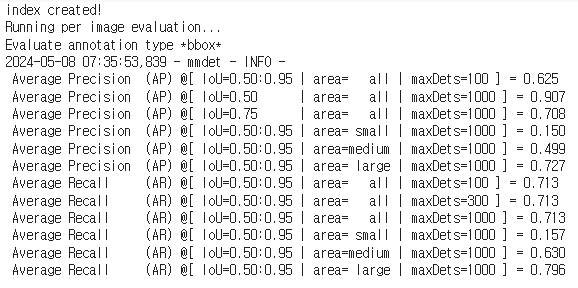

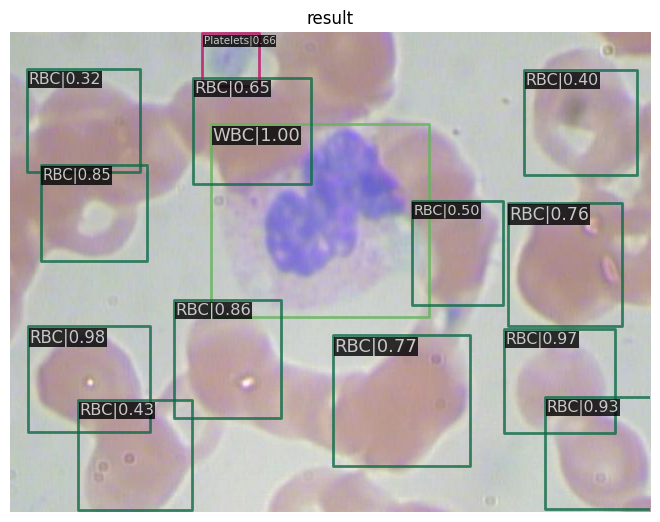

In [51]:
import cv2
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

img = cv2.imread('/content/BCCD_Dataset/BCCD/JPEGImages/BloodImage_00007.jpg')

model.cfg = cfg

result = inference_detector(model, img)
show_result_pyplot(model, img, result)

## 테스트 데이터 세트에 Inference 및 Evaluation 적용하기
- 런타임 다시 시작해야 함(버근가?)
- tools/test.py 스크립트는 colab에서 오류 발생
- 테스트용 Dataset과 DataLoader 생성하고 single_gpu_test() 호출하여 inference 결과를 반환. batch_size를 1로 설정하지 않으면 single_gpu_test()오류 발생

In [52]:
### 아래는 런타임 다시 시작 후 실행

from mmcv import Config
from mmdet.datasets.builder import DATASETS
from mmdet.datasets.coco import CocoDataset
from mmdet.apis import set_random_seed

@DATASETS.register_module(force=True)
class BCCDDataset(CocoDataset):
    CLASSES = ('WBC', 'RBC', 'Platelets')

config_file = '/content/mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
checkpoint_file = '/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_2020'

cfg = Config.fromfile(config_file)

# dataset에 대한 환경 파라미터 수정
cfg.dataset_type = 'BCCDDataset'
cfg.data_root = '/content/BCCD_Dataset/BCDD/'

# train, val, test dataset에 대한 type, data_root, ann_file, img_prefix 환경 파라미터 수정
cfg.data.train.type = 'BCCDDataset'
cfg.data.train.data_root = '/content/BCCD_Dataset/BCCD/'
cfg.data.train.ann_file = 'train.json'
cfg.data.train.img_prefix = 'JPEGImages'

cfg.data.val.type = 'BCCDDataset'
cfg.data.val.data_root = '/content/BCCD_Dataset/BCCD/'
cfg.data.val.ann_file = 'val.json'
cfg.data.val.img_prefix = 'JPEGImages'

cfg.data.test.type = 'BCCDDataset'
cfg.data.test.data_root = '/content/BCCD_Dataset/BCCD/'
cfg.data.test.ann_file = 'test.json'
cfg.data.test.img_prefix = 'JPEGImages'

# class의 갯수 수정.
cfg.model.roi_head.bbox_head.num_classes = 3
# pretrained 모델
cfg.load_from = '/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

# 학습 weight 파일로 로그를 저장하기 위한 디렉토리 설정.
cfg.work_dir = './tutorial_exps'

# 학습율 변경 환경 파라미터 설정.
cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = None
cfg.log_config.interval = 10

# CocoDataset의 경우 metric을 bbox로 설정해야 함.
# (mAP아님. bbox로 설정하면 mAP를 iou threshold를 0.5 ~ 0.95까지 변경하면서 측정)
cfg.evaluation.metric = 'bbox'
cfg.evaluation.interval = 12
cfg.checkpoint_config.interval = 12

# bug(?)로 인해 test용 dataset evaluation 시 1로 설정. data loader에서 GPU갯수별 Batch size 임.
cfg.data.samples_per_gpu = 1 # pytorch 기반
                             # 디폴트는 2개
                             # 1이 아닌 다른 값을 하면 오류가 있다

# 두번 config를 로드하면 lr_config의 policy가 사라지는 오류로 인하여 설정.
cfg.lr_config.policy='step'
# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)
print(cfg.pretty_text)

model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.

In [53]:
# Config 파일을 만들어 줌
cfg.dump('/content/tutorial_exps/bccd_faster_rcnn_conf.py')

In [18]:
!mkdir -p /content/show_test_output

In [54]:
# tools/test.py는 colab에서 제대로 동작하지 않음.
# 얘를 돌리면 다른 프로세서에서 돌아감.
# 지금까지 메인 프로세서에서 돌렸는데, 얘는 다른 프로세서다 보니 만든 디렉토리를 인식 못 함(에러)
%cd /content/mmdetection
!python tools/test.py /content/tutorial_exps/bccd_faster_rcnn_conf.py /content/tutorial_exps/epoch_12.pth \
--eval 'bbox' \
--show-dir /content/show_test_output

/content/mmdetection
/usr/local/lib/python3.10/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mmdet-2.28.2-py3.10.egg/mmdet/utils/setup_env.py:38: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mmdet-2.28.2-py3.10.egg/mmdet/utils/setup_env.py:48: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloade

## 테스트용 dataset과 dataloader를 별도로 설정하고 trained된 checkpoint 모델을 로딩하여 test 수행.

In [55]:
from mmdet.datasets import (build_dataloader, build_dataset, replace_ImageToTensor)

# test용 Dataset과 DataLoader 생성.
# build_dataset()호출 시 list로 감싸지 않는 것이 train용 dataset 생성시와의 차이.
dataset = build_dataset(cfg.data.test)
data_loader = build_dataloader(
              dataset,
              # 반드시 아래 samples_per_gpu 인자값은 1로 설정(버그 때문에)
              samples_per_gpu = cfg.data.samples_per_gpu,
              workers_per_gpu = cfg.data.workers_per_gpu,
              dist = False,
              shuffle = False)

# 반드시 아래 코드에서 'img' 키 값이 tensor로 출력되어야 함.
next(iter(data_loader))

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


{'img_metas': [DataContainer([[{'filename': '/content/BCCD_Dataset/BCCD/JPEGImages/BloodImage_00007.jpg', 'ori_filename': 'BloodImage_00007.jpg', 'ori_shape': (480, 640, 3), 'img_shape': (800, 1067, 3), 'pad_shape': (800, 1088, 3), 'scale_factor': array([1.6671875, 1.6666666, 1.6671875, 1.6666666], dtype=float32), 'flip': False, 'flip_direction': None, 'img_norm_cfg': {'mean': array([123.675, 116.28 , 103.53 ], dtype=float32), 'std': array([58.395, 57.12 , 57.375], dtype=float32), 'to_rgb': True}}]])],
 'img': [tensor([[[[0.9474, 0.9474, 0.9474,  ..., 0.0000, 0.0000, 0.0000],
            [0.9474, 0.9474, 0.9474,  ..., 0.0000, 0.0000, 0.0000],
            [0.9646, 0.9646, 0.9646,  ..., 0.0000, 0.0000, 0.0000],
            ...,
            [1.1700, 1.1700, 1.1700,  ..., 0.0000, 0.0000, 0.0000],
            [1.1700, 1.1700, 1.1700,  ..., 0.0000, 0.0000, 0.0000],
            [1.1700, 1.1700, 1.1700,  ..., 0.0000, 0.0000, 0.0000]],
  
           [[1.2031, 1.2031, 1.2031,  ..., 0.0000, 0.000

In [56]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

checkpoint_file = '/content/tutorial_exps/epoch_12.pth'

# checkpoint 저장된 model 파일을 이용하여 모델을 생성. 이 때, Config는 위에서 update된 config 사용.
model_ckpt = init_detector(cfg, checkpoint_file, device='cuda:0')

load checkpoint from local path: /content/tutorial_exps/epoch_12.pth


In [57]:
from mmdet.apis import multi_gpu_test, single_gpu_test
from mmcv.parallel import MMDataParallel, MMDistributedDataParallel
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

model_ckpt = MMDataParallel(model_ckpt, device_ids=[0])# 병렬 처리를 위함(인듯)
# single_gpu_test() 를 호출하여 test데이터 세트의 interence 수행. 반드시 batch size는 1이 되어야 함.
# 위에서 만든 /content/show_test_output 디렉토리에 interence 결과가 시각화된 이미지가 저장됨.(True값)
# 0.3은 threshold
outputs = single_gpu_test(model_ckpt, data_loader, True, '/content/show_test_output', 0.3)

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 72/72, 4.0 task/s, elapsed: 18s, ETA:     0s

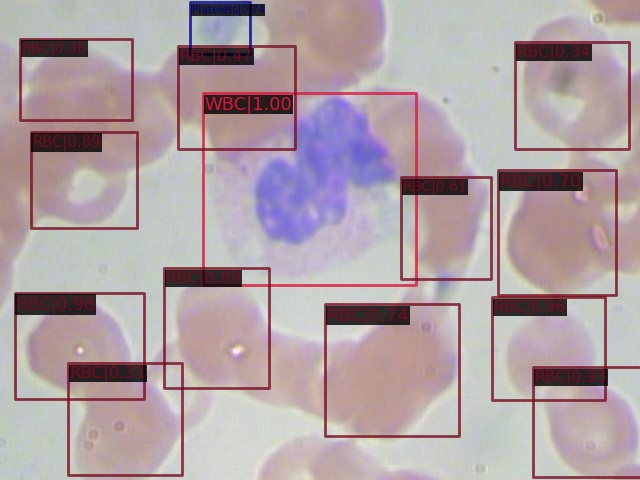

## batch 크기를 1보다 크게 하고 테스트를 수행하려면(권장 드리지 않아유)
- 만일 batch size를 1보다 크게 해서 설정하려면 cfg.data.samples_per_gpu 값을 1보다 크게 설정하고 single_gpu_test()함수의 버그(?)코드 수정 필요.
- 런타임 다시 시작 후 config부터 재설정 한 다음, 아래 코드 수행 필요. 여기서는 스킵하겠다

In [ ]:
import os.path as osp
import pickle
import shutil
import tempfile
import time

import mmcv
import torch
import torch.distributed as dist
from mmcv.image import tensor2imgs
from mmcv.runner import get_dist_info
'''
def single_gpu_test_batch(model,
                    data_loader,
                    show=False,
                    out_dir=None,
                    show_score_thr=0.3):
    model.eval()
    results = []
    dataset = data_loader.dataset
    prog_bar = mmcv.ProgressBar(len(dataset))
    for i, data in enumerate(data_loader):
        with torch.no_grad():
            result = model(return_loss=False, rescale=True, **data)

        batch_size = len(result)
        if show or out_dir:
            if batch_size == 1 and isinstance(data['img'][0], torch.Tensor):
                img_tensor = data['img'][0]
            else:
                # 아래 코드를 주석 처리 필요. batch_size가 1보다 클때는
                # data['img'][0].data[0]가 아니라 data['img'][0].data 가 되어야 함.
                #img_tensor = data['img'][0].data[0]
                # 아래는 버그(?) 수정 코드
                img_tensor = data['img'][0].data
                print('img_tensor shape2:', img_tensor.shape)
            img_metas = data['img_metas'][0].data[0]
            imgs = tensor2imgs(img_tensor, **img_metas[0]['img_norm_cfg'])
            assert len(imgs) == len(img_metas)

            for i, (img, img_meta) in enumerate(zip(imgs, img_metas)):
                h, w, _ = img_meta['img_shape']
                img_show = img[:h, :w, :]

                ori_h, ori_w = img_meta['ori_shape'][:-1]
                img_show = mmcv.imresize(img_show, (ori_w, ori_h))

                if out_dir:
                    out_file = osp.join(out_dir, img_meta['ori_filename'])
                else:
                    out_file = None

                model.module.show_result(
                    img_show,
                    result[i],
                    show=show,
                    out_file=out_file,
                    score_thr=show_score_thr)

        # encode mask results
        if isinstance(result[0], tuple):
            result = [(bbox_results, encode_mask_results(mask_results))
                      for bbox_results, mask_results in result]
        results.extend(result)

        for _ in range(batch_size):
            prog_bar.update()
    return results

from mmdet.apis import multi_gpu_test, single_gpu_test
from mmcv.parallel import MMDataParallel, MMDistributedDataParallel
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

model_ckpt = MMDataParallel(model_ckpt, device_ids=[0])
# single_gpu_test() 를 호출하여 test데이터 세트의 interence 수행. 반드시 batch size는 1이 되어야 함.
outputs = single_gpu_test_batch(model_ckpt, data_loader, True, '/content/tutorial_exps', 0.3)
'''

## 변환된 test용 데이터세트의 inference 적용 결과 확인 및 성능 evaluation 수행

In [58]:
print('결과 outputs type:', type(outputs)) # output type은 list
print('evalution 된 파일의 갯수:', len(outputs)) # test 이미지가 72개
print('첫번째 evalutation 결과의 type:', type(outputs[0]))
print('첫번째 evaluation 결과의 CLASS 갯수:', len(outputs[0]))
# outputs[0][0].shape = (detect된 object 수, 5)
print('첫번째 evaluation 결과의 CLASS ID 0의 type과 shape', type(outputs[0][0]), outputs[0][0].shape)

결과 outputs type: <class 'list'>
evalution 된 파일의 갯수: 72
첫번째 evalutation 결과의 type: <class 'list'>
첫번째 evaluation 결과의 CLASS 갯수: 3
첫번째 evaluation 결과의 CLASS ID 0의 type과 shape <class 'numpy.ndarray'> (1, 5)


In [ ]:
print(outputs)

In [60]:
# Test data로 inference 적용 후 Evaluate
metric = dataset.evaluate(outputs, metric='bbox')
print(metric)


Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.33s).
Accumulating evaluation results...
DONE (t=0.05s).

 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.635
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.922
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.740
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.648
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.509
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.478
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.723
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.723
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.723
 Average Recall     (AR) @[ IoU=0.50:0.95